In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
from statannot import add_stat_annotation

# Load data

In [2]:
data_actin = pandas.read_csv(r'Data\Fig_2_S2_Actin.csv')
data_pi = pandas.read_csv(r'Data\Fig_2_S2_Pi.csv')

# Spheroid reduction in time

C:\Users\vabonnet\AppData\Local\miniconda3\envs\APC\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


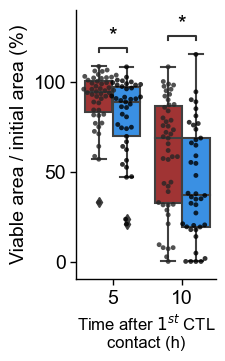

In [3]:
# Define font
plt.rc('font',family='Arial')

# Plot
fig, ax = plt.subplots(1, figsize = (1.8,3.5))

ax.set_ylim(-10,120)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)        
ax.tick_params(width=1, length=4)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1)

sns.boxplot(ax = ax,
            data=data_actin,
            x='time_after_contact',
            y='percent_reduc',
            hue = 'type',
            palette = ['firebrick', 'dodgerblue'])

sns.swarmplot(ax = ax,
              data=data_actin,
              size = 3.5,
              alpha = 0.8,
              x='time_after_contact',
              y='percent_reduc',
              hue = 'type',
              color = 'k',
              dodge=True,
              label = None)

add_stat_annotation(ax,
                    data=data_actin,
                    x='time_after_contact',
                    y='percent_reduc',
                    hue = 'type',
                    box_pairs=[((5, 'WT'), (5,'APC')),((10, 'WT'), (10,'APC'))],
                    test = 'Mann-Whitney',
                    fontsize = 16,
                    comparisons_correction=None, 
                    text_format='star',
                    loc='inside',
                    verbose=0)

ax.set_xlabel(r'Time after $1^{st}$ CTL' + '\n' + 'contact (h)', fontsize=12)
ax.set_ylabel('Viable area / initial area (%)', fontsize= 14)
ax.get_legend().remove()
plt.show()

# Viability after 24h of coculture

C:\Users\vabonnet\AppData\Local\miniconda3\envs\APC\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vabonnet\AppData\Local\miniconda3\envs\APC\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vabonnet\AppData\Local\miniconda3\envs\APC\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


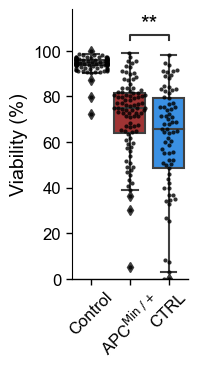

In [4]:
plt.rc('font',family='Arial')
fig, ax = plt.subplots(1, figsize = (1.5,3.5))
ax.set_ylim(0,100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)       
ax.tick_params(width=1, length=4)#, labelleft = False)
for axis in ['bottom']:
    ax.spines[axis].set_linewidth(1)

order = ['control', 'APC', 'WT']
    
sns.boxplot(ax = ax,
            data=data_pi,
            x = 'type', y='viab',
            palette = ['grey', 'firebrick','dodgerblue'],
            order = order)

sns.swarmplot(ax = ax, 
              data=data_pi,
              x = 'type',
              y='viab',
              size = 3,
              alpha = 0.8,
              order = order,
              color = 'k')

add_stat_annotation(ax = ax,
                    data=data_pi,
                    x='type',
                    y='viab',
                    order = order,
                    fontsize = 16,
                    box_pairs=[('APC', 'WT')],
                    test='t-test_welch',
                    comparisons_correction=None,
                    text_format='star', loc='inside', verbose=0)

ax.set_xlabel(' ', fontsize=12)
ax.set_ylabel('Viability (%)', fontsize= 14)
labels = ['Control', r'APC$^{\mathrm{Min}\ /+}$', 'CTRL']
ax.set_xticklabels(labels)
plt.show()

In [5]:
# Binning number of CTLs
data_pi['binned_CTL'] = 10*(np.array(data_pi['nb_CTL'])//10)
data_pi.loc[data_pi.type == 'control', 'binned_CTL'] = '0'
data_pi.loc[data_pi.binned_CTL == 0, 'binned_CTL'] = '1-9'
data_pi.loc[data_pi.binned_CTL == 10, 'binned_CTL'] = '10-19'
data_pi.loc[data_pi.binned_CTL == 20, 'binned_CTL'] = '20-29'

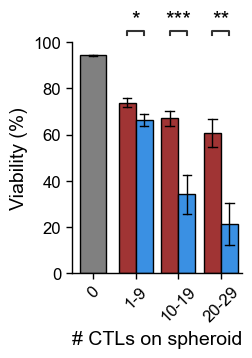

In [6]:
# Define font
plt.rc('font',family='Arial')

# Plot
fig, ax = plt.subplots(1, figsize = (2.2,3))

ax.set_ylim(0,100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)        
ax.tick_params(width=1, length=4)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1)

order = ['0', '1-9', '10-19', '20-29']
hue_order = ['APC', 'WT']
    
sns.barplot(
    x = 'binned_CTL',
    y = 'viab',
    hue = 'type',
    data=data_pi.loc[data_pi.type == 'control'],
    order = order,
    # hue_order = hue_order,
    palette = ['grey'],
    errorbar='se',
    errcolor='black',
    capsize=0.2,
    errwidth=1,
    color = 'r',
    lw = 1, 
    edgecolor="0",
    width=0.6
)

sns.barplot(
    x = 'binned_CTL',
    y = 'viab',
    hue = 'type',
    data=data_pi,
    order = order,
    hue_order = hue_order,
    palette = ['firebrick','dodgerblue'],
    errorbar='se',
    estimator = np.mean,
    errcolor='black',
    capsize=0.2,
    errwidth=1,
    color = 'r',
    lw = 1, 
    edgecolor="0",
)

add_stat_annotation(ax = ax,
    x = 'binned_CTL',
    y = 'viab',
    hue = 'type',
    data=data_pi,
    order = order,
    hue_order = hue_order,
    box_pairs=[(('1-9', 'APC'), ('1-9', 'WT')),
               (('10-19', 'APC'), ('10-19', 'WT')),
               (('20-29', 'APC'), ('20-29', 'WT')),],
    test='Mann-Whitney', 
    comparisons_correction=None, 
    fontsize = 16,
    text_format='star', loc='outside', verbose=0)

ax.set_xlabel('# CTLs on spheroid', fontsize = 14)
ax.set_ylabel('Viability (%)', fontsize = 14)
ax.get_legend().remove()
plt.show()